In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES


In [23]:
key = get_random_bytes(16)
test_block = get_random_bytes(16)
cipher = AES.new(key, AES.MODE_ECB)
target = cipher.encrypt(test_block)

In [28]:
def hd(bytes1, bytes2):
    t1, t2 = bytes1.hex(), bytes2.hex()
    t1, t2 = int(t1, 16), int(t2, 16)
    
    res = t1 ^ t2
    return bin(res).count('1')
    
    
block_hex = int(test_block.hex(), 16)
i = 1
xor = 1

distances = []

amount = len(bin(block_hex))

while xor < block_hex:

    print(f'\rDone: {i / amount}%', end='')
    
    tmp_hex = block_hex ^ xor
    try:
        tmp_block = bytes.fromhex(hex(tmp_hex)[2:])
    except Exception as e:
        tmp_block = bytes.fromhex('0'+hex(tmp_hex)[2:])
    tmp_res = cipher.encrypt(tmp_block)
    distances.append(hd(target, tmp_res))
    i += 1
    xor = 1 << i

Done: 0.9769230769230769%%%

(array([ 3.,  3.,  0.,  1.,  0.,  3.,  2.,  0.,  4.,  0.,  5.,  0.,  9.,
         9.,  0.,  8.,  0.,  9.,  0.,  9., 10.,  0., 11.,  0.,  9.,  0.,
         6.,  6.,  0.,  7.,  0.,  3.,  0.,  3.,  5.,  0.,  1.,  0.,  0.,
         1.]),
 array([53.   , 53.575, 54.15 , 54.725, 55.3  , 55.875, 56.45 , 57.025,
        57.6  , 58.175, 58.75 , 59.325, 59.9  , 60.475, 61.05 , 61.625,
        62.2  , 62.775, 63.35 , 63.925, 64.5  , 65.075, 65.65 , 66.225,
        66.8  , 67.375, 67.95 , 68.525, 69.1  , 69.675, 70.25 , 70.825,
        71.4  , 71.975, 72.55 , 73.125, 73.7  , 74.275, 74.85 , 75.425,
        76.   ]),
 <a list of 40 Patch objects>)

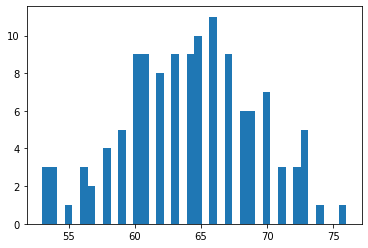

In [29]:
plt.hist(distances, bins=40)

In [31]:
np.mean(distances)

64.15748031496064

In [32]:
min(distances)

53